In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

## Question 1

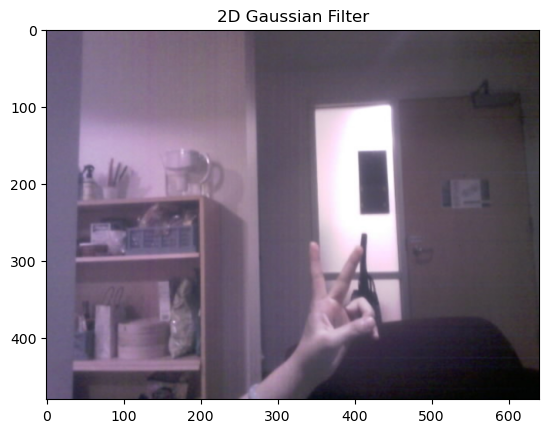

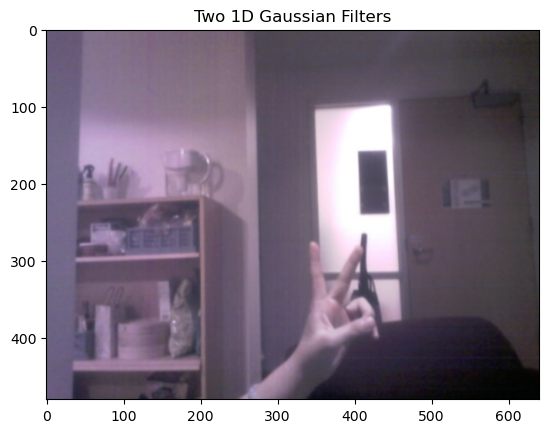

In [12]:
imdata1 = cv2.imread('low_res_2.jpg', cv2.IMREAD_COLOR)
imdata1 = cv2.cvtColor(imdata1, cv2.COLOR_BGR2RGB)

# Apply 2D Gaussian Filter
g_filter = cv2.GaussianBlur(imdata1, (0, 0), 0.5)

# Define sigma
sigma = np.sqrt(0.5)

# Create 1D Gaussian kernel
def gaussian_1d(size, sigma):
    """Create a 1D Gaussian kernel."""
    center = size // 2
    x = np.arange(size) - center
    gauss = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x**2) / (2 * sigma**2))
    return gauss / np.sum(gauss)  # Normalize

kernel_size = int(6 * sigma) + 1  # Ensure it's odd

# Create Gaussian kernels for i (rows) and j (columns)
gauss_i = gaussian_1d(kernel_size, sigma)
gauss_j = gaussian_1d(kernel_size, sigma)

# Apply 1d filter along rows
smoothed_i = cv2.filter2D(imdata1, -1, gauss_i[:, np.newaxis])  # Apply kernel along rows

# Apply 1c filter along columns 
smoothed_j = cv2.filter2D(smoothed_i, -1, gauss_j[np.newaxis, :])  # Apply kernel along columns

# Display the images
plt.figure(1)
plt.imshow(g_filter)
plt.title('2D Gaussian Filter')

plt.figure(2)
plt.imshow(smoothed_j)
plt.title('Two 1D Gaussian Filters')

plt.show()

## Question 2: Median Filtering

In [5]:
# a)
matrix = np.random.random((3, 3))
flattened = matrix.flatten() 

# b)
sorted_array = np.sort(flattened)

# c)
median_value = np.median(sorted_array)
print(f'median value: {median_value}')

# d)
sorted_matrix = sorted_array.reshape(3, 3)
print(sorted_matrix)

[0.00385319 0.83285924 0.2574816  0.8590102  0.05935816 0.92057839
 0.37961604 0.07384762 0.66037817]
[0.00385319 0.05935816 0.07384762 0.2574816  0.37961604 0.66037817
 0.83285924 0.8590102  0.92057839]
0.3796160364988389
[[0.00385319 0.05935816 0.07384762]
 [0.2574816  0.37961604 0.66037817]
 [0.83285924 0.8590102  0.92057839]]


 ## Question 3: Noise and Gaussian Filter

(480, 640)


Text(0.5, 1.0, 'Combined Uniform')

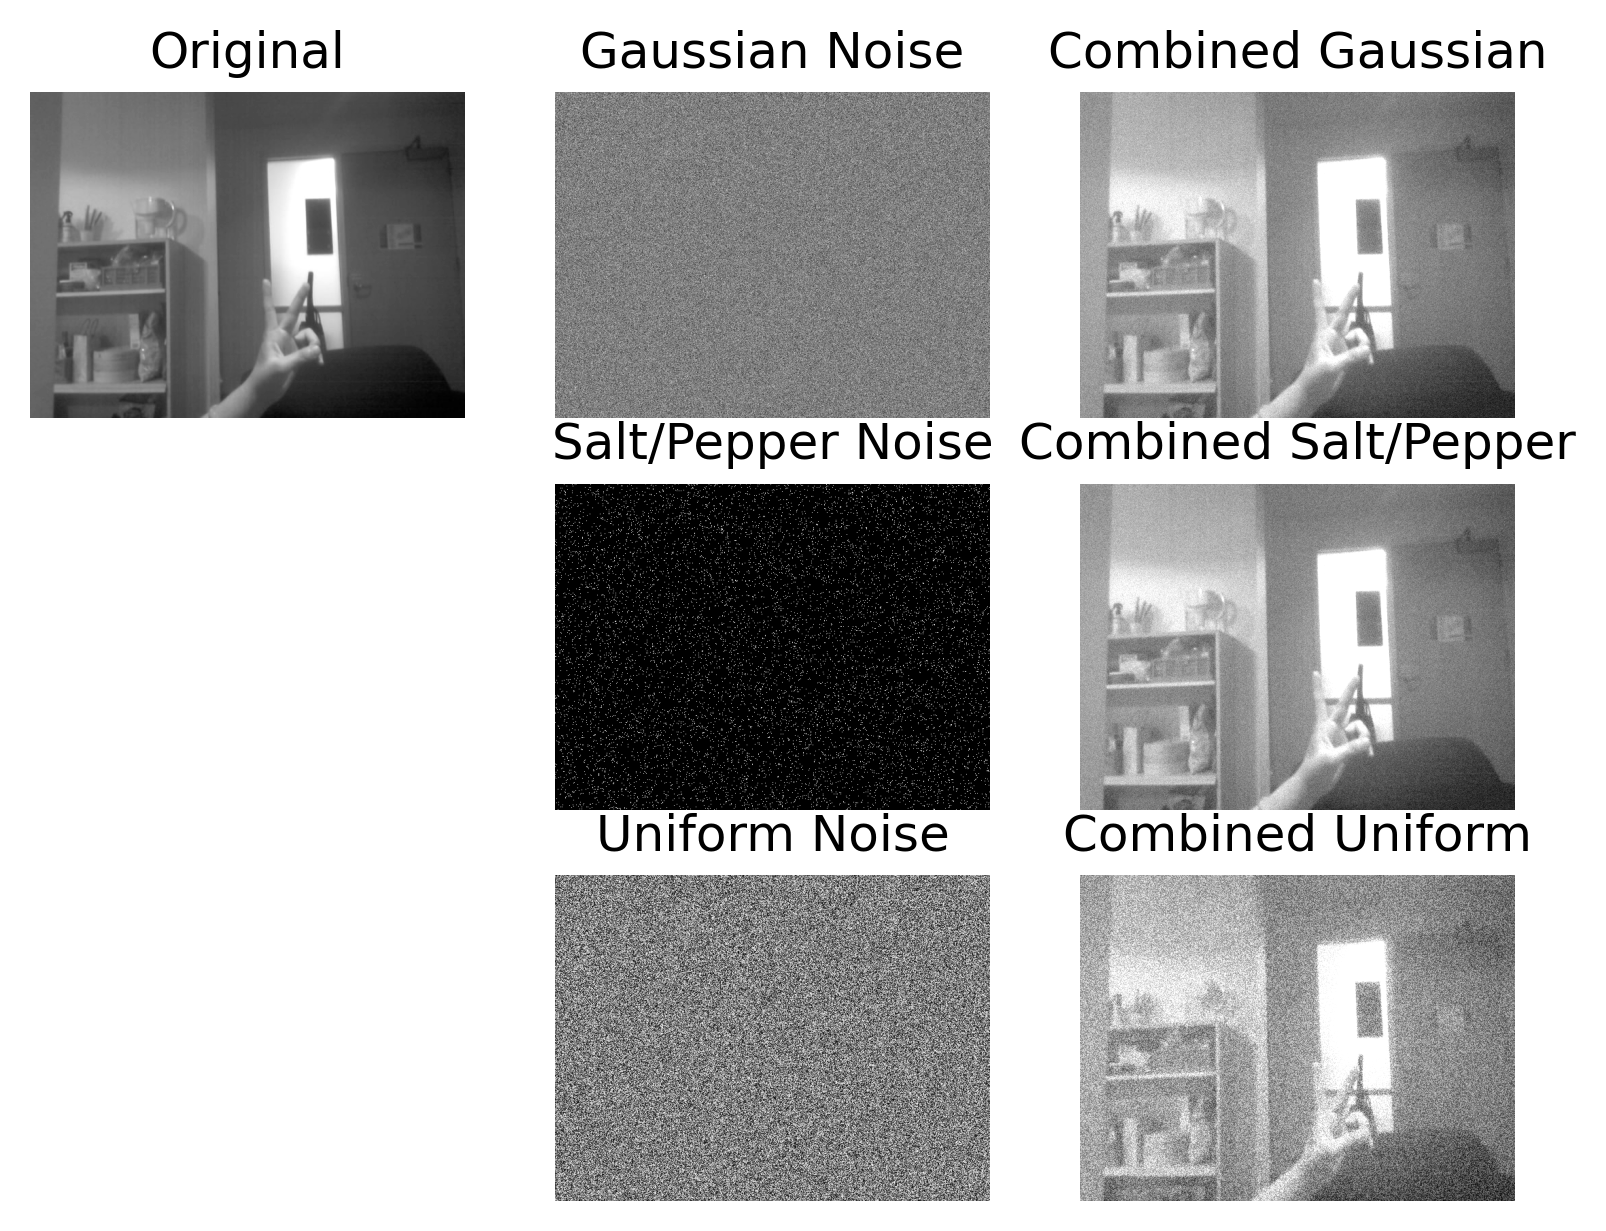

In [17]:
#READING IN IMAGE
img = cv2.imread('low_res_2.jpg',0)
print(img.shape)


# ADDING NOISE 

# gauss noise
gauss_noise=np.zeros((480, 640),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

gn_img=cv2.add(img,gauss_noise)

# salt and pepper noise
sp_noise=np.zeros((480, 640),dtype=np.uint8)
cv2.randu(sp_noise,0,255)
sp_noise=cv2.threshold(sp_noise,245,255,cv2.THRESH_BINARY)[1]

sp_img=cv2.add(img,sp_noise)

# uniform noise 
uni_noise=np.zeros((480, 640),dtype=np.uint8)
cv2.randu(uni_noise,0,255)
uni_noise=(uni_noise*0.5).astype(np.uint8)

un_img=cv2.add(img,uni_noise)


# PLOTTING IMAGES WITH NOISE 
fig=plt.figure(dpi=300)

# OG image
fig.add_subplot(3,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

# gaussian noise 
fig.add_subplot(3,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

# gaussian noise image
fig.add_subplot(3,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined Gaussian")

# salt/pepper noise 
fig.add_subplot(3,3,5)
plt.imshow(sp_noise,cmap='gray')
plt.axis("off")
plt.title("Salt/Pepper Noise")

# gaussian filtered image
fig.add_subplot(3,3,6)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined Salt/Pepper")

# uniform noise 
fig.add_subplot(3,3,8)
plt.imshow(uni_noise,cmap='gray')
plt.axis("off")
plt.title("Uniform Noise")

# uniform filtered image
fig.add_subplot(3,3,9)
plt.imshow(un_img,cmap='gray')
plt.axis("off")
plt.title("Combined Uniform")


Text(0.5, 1.0, 'Uniform Blurred')

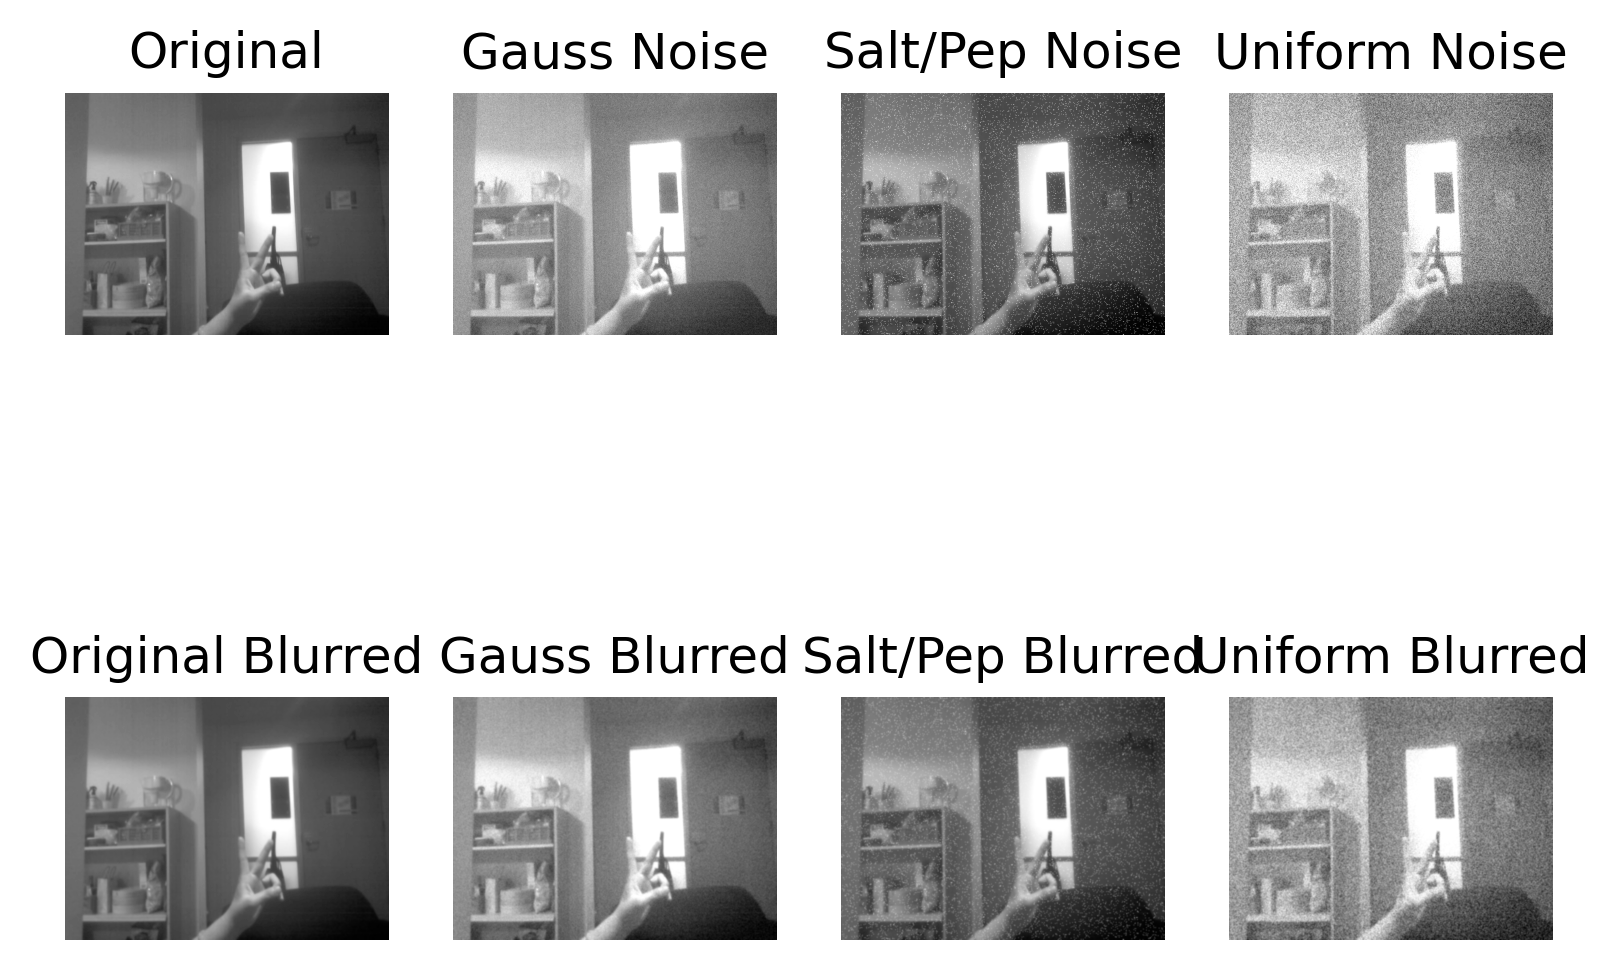

In [21]:
# GAUSSIAN BLURRING NOISY IMAGES 
og_blur = cv2.GaussianBlur(img,(5,5),0)
gn_blur = cv2.GaussianBlur(gn_img,(5,5),0)
sp_blur = cv2.GaussianBlur(sp_img,(5,5),0)
uni_blur = cv2.GaussianBlur(un_img,(5,5),0)


# PLOTTING GAUSSIAN BLURS
fig2 = plt.figure(dpi=300)

fig2.add_subplot(2,4,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig2.add_subplot(2,4,5)
plt.imshow(og_blur,cmap='gray')
plt.axis("off")
plt.title("Original Blurred")

fig2.add_subplot(2,4,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Gauss Noise")

fig2.add_subplot(2,4,6)
plt.imshow(gn_blur,cmap='gray')
plt.axis("off")
plt.title("Gauss Blurred")

fig2.add_subplot(2,4,3)
plt.imshow(sp_img,cmap='gray')
plt.axis("off")
plt.title("Salt/Pep Noise")

fig2.add_subplot(2,4,7)
plt.imshow(sp_blur,cmap='gray')
plt.axis("off")
plt.title("Salt/Pep Blurred")

fig2.add_subplot(2,4,4)
plt.imshow(un_img,cmap='gray')
plt.axis("off")
plt.title("Uniform Noise")

fig2.add_subplot(2,4,8)
plt.imshow(uni_blur,cmap='gray')
plt.axis("off")
plt.title("Uniform Blurred")

source: https://www.kaggle.com/code/chanduanilkumar/adding-and-removing-image-noise-in-python